In [29]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [30]:
# Read the CSV file
hsg = pd.read_csv(r'C:\Documents\PTTK\Project\HSG Historical Data.csv')

hsg = hsg.sort_index(ascending=False)
hsg = hsg.reset_index(drop=True)
hsg['Date'] = pd.to_datetime(hsg['Date'])
hsg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
hsg['Change %'] = hsg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
hsg['Change %'] = hsg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    hsg[col] = hsg[col].str.replace(',', '').astype(float)

missing_values = hsg.isnull().sum()
hsg = hsg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
hsg['Vol.'] = hsg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
df = hsg[['Price']]
df

,Price
Date,
2020-01-02,5909.1
2020-01-03,5757.6
2020-01-06,5786.4
2020-01-07,5721.5
2020-01-08,5678.2
...,...
2024-10-28,20750.0
2024-10-29,20700.0
2024-10-30,20350.0


In [31]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [32]:
# 4. Chia train test
train_size = round(0.7 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size + 1]
test_data = df[train_size:]

In [33]:
# 5. Hàm Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [34]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
# 8. Define RNN Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\hien0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2267
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0088
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0024
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0020
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0019
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0016
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

In [38]:
# 10. Dự báo dữ liệu test
y_pred=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [39]:
# 11. Chuẩn hóa dữ liệu y_pred, ytest
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [43]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = mean_absolute_percentage_error(ytest, y_pred) * 100
test_mae = mean_absolute_error(ytest, y_pred)

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)

Testing RMSE: 655.0441889486476
Testing MAPE: 2.3350557931359828
Testing MAE: 487.8332016283525
Testing R^2: 0.8598362669704751


In [41]:
# 13. Dự báo 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))


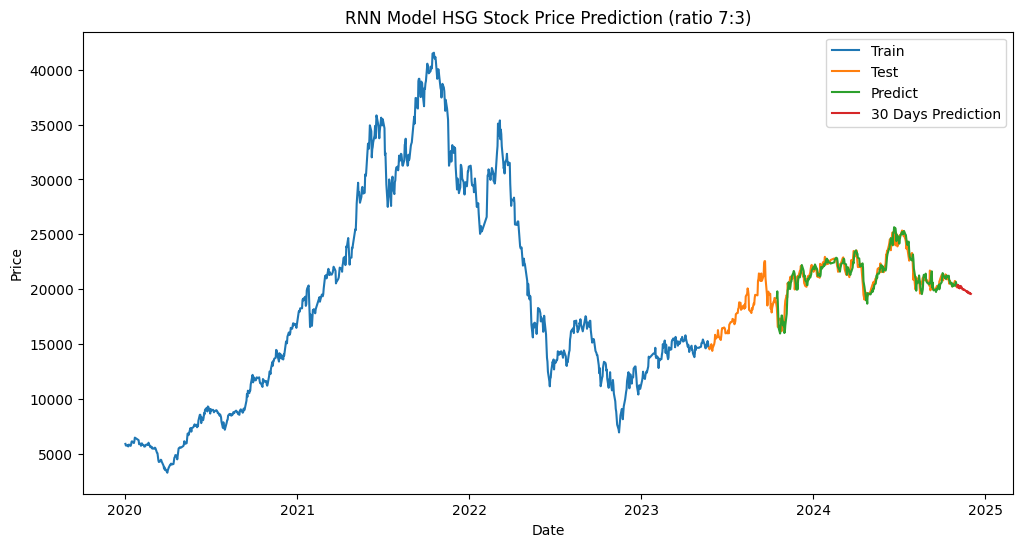

In [42]:
# Assuming hsg['Date'] is the index and it's in DatetimeIndex format
dates = hsg.index

# Plotting train, test, and predicted data
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(dates[:train_size+1], scaler.inverse_transform(train_data), label='Train')

# Plot the test data
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')

# Predict start index for the test data
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

# Get the last date from the dataset
last_date = dates[-1]

# Forecasting the next 30, 60, and 90 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Combine the predictions for 30, 60, and 90 days
plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')

# Add title and labels
plt.title('RNN Model HSG Stock Price Prediction (ratio 7:3)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()
